In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import os
import re

In [16]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-20-CVD\\IdVd-3V"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [9]:
file_first = file_list[3]
df = mo.read_csv_direction(file_first)
df

,VD,VG,VBG,ID,IG,sqrtID,forward
0,0.000,-1.5,2,-0.005238,-7.262300e-10,0.000072,True
1,0.015,-1.5,2,-0.000263,-6.772000e-10,0.000016,True
2,0.030,-1.5,2,-0.000126,-6.711200e-10,0.000011,True
3,0.045,-1.5,2,-0.000075,-6.524300e-10,0.000009,True
4,0.060,-1.5,2,-0.000047,-6.500400e-10,0.000007,True
...,...,...,...,...,...,...,...
1409,0.060,1.5,2,0.037977,2.118200e-10,0.000195,False
1410,0.045,1.5,2,0.028061,2.408600e-10,0.000168,False
1411,0.030,1.5,2,0.018334,2.172800e-10,0.000135,False
1412,0.015,1.5,2,0.006927,2.713700e-10,0.000083,False


In [10]:
df_reshaped = mo.reshape_table_by_VG(df)
df_reshaped.columns

MultiIndex([(' ID', -1.5),
            (' ID', -1.0),
            (' ID', -0.5),
            (' ID',  0.0),
            (' ID',  0.5),
            (' ID',  1.0),
            (' ID',  1.5)],
           names=[None, ' VG'])

In [11]:
df_sorted = mo.reorder_by_VD(df_reshaped)
df_new = df_sorted.reset_index().set_index(' VD')
df_new

,forward,V_G = -1.5,V_G = -1.0,V_G = -0.5,V_G = 0.0,V_G = 0.5,V_G = 1.0,V_G = 1.5
VD,,,,,,,,
0.000,False,-0.000575,-0.004132,-0.003964,-0.003861,-0.004053,-0.004128,-0.004243
0.015,False,-0.000499,-0.004036,-0.003770,-0.001702,0.004066,0.006410,0.006927
0.030,False,-0.000411,-0.003834,-0.003704,0.000179,0.011470,0.016305,0.018334
0.045,False,-0.000387,-0.003639,-0.003532,0.001781,0.018862,0.025238,0.028061
0.060,False,-0.000314,-0.003505,-0.003429,0.003221,0.024951,0.033870,0.037977
...,...,...,...,...,...,...,...,...
0.060,True,-0.000047,-0.000186,-0.002265,0.004708,0.026702,0.035341,0.039562
0.045,True,-0.000075,-0.000253,-0.002546,0.003089,0.019874,0.026428,0.029846
0.030,True,-0.000126,-0.000334,-0.002854,0.001173,0.012425,0.016657,0.019304


In [12]:
df_new.drop(columns=' forward',inplace=True)
df_new.columns

Index(['V_G = -1.5', 'V_G = -1.0', 'V_G = -0.5', 'V_G = 0.0', 'V_G = 0.5',
       'V_G = 1.0', 'V_G = 1.5'],
      dtype='object')

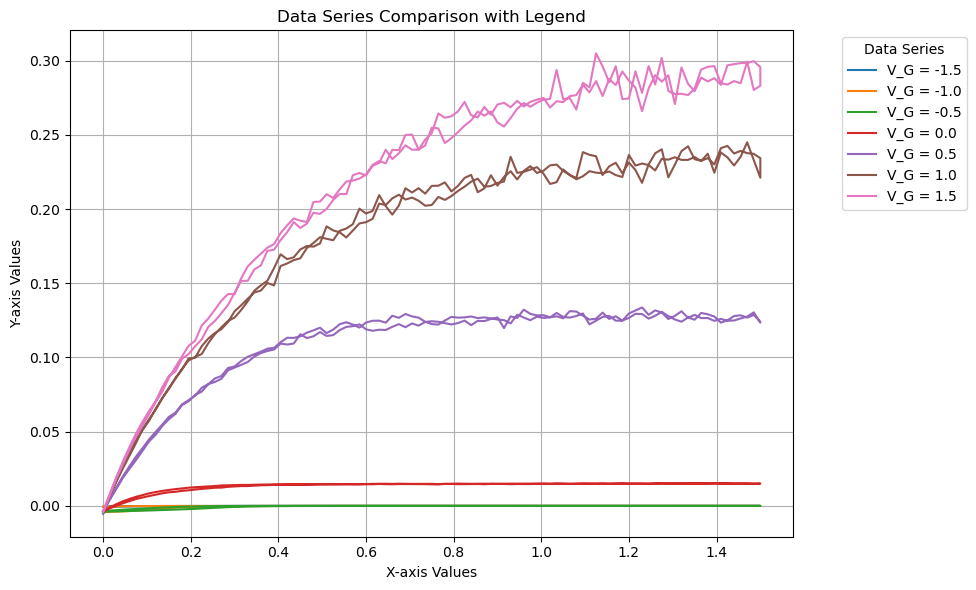

In [13]:
ax = df_new.plot( kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [17]:
for file in file_list:
    print(f'{file} started')
    
    df = mo.read_csv_direction(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VD(df_reshaped)
    df_new = df_sorted.reset_index().set_index(' VD')
    df_new.drop(columns=' forward',inplace=True)
    filename =directory_path + '\\sorted\\' + file[54:]
    df_new.to_csv(filename, index=True)
    

C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVd-3V\R10C3-B_4VBG_ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVd-3V\R11C2-B_4VBG_ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVd-3V\R11C3-B_SwapSD_ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-20-CVD\IdVd-3V\R9C4-B_4VBG_ExfoliatedMoS2_TGIdVd.csv started
